In [25]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_colwidth", 500)
%matplotlib inline

In [26]:
#Load Data
laptop = pd.read_csv('laptop_data_price_prediction.csv')
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [27]:
# Descriptive Statistics
round(laptop.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Ram,1273.0,8.45,5.10,2.00,4.00,8.00,8.00,64.00
Weight,1273.0,2.04,0.67,0.69,1.50,2.04,2.31,4.70
Price,1273.0,10.83,0.62,9.13,10.39,10.87,11.29,12.69
TouchScreen,1273.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00
Ips,1273.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
Ppi,1273.0,146.95,42.93,90.58,127.34,141.21,157.35,352.47
HDD,1273.0,413.72,518.05,0.00,0.00,0.00,1000.00,2000.00
SSD,1273.0,186.25,186.53,0.00,0.00,256.00,256.00,1024.00


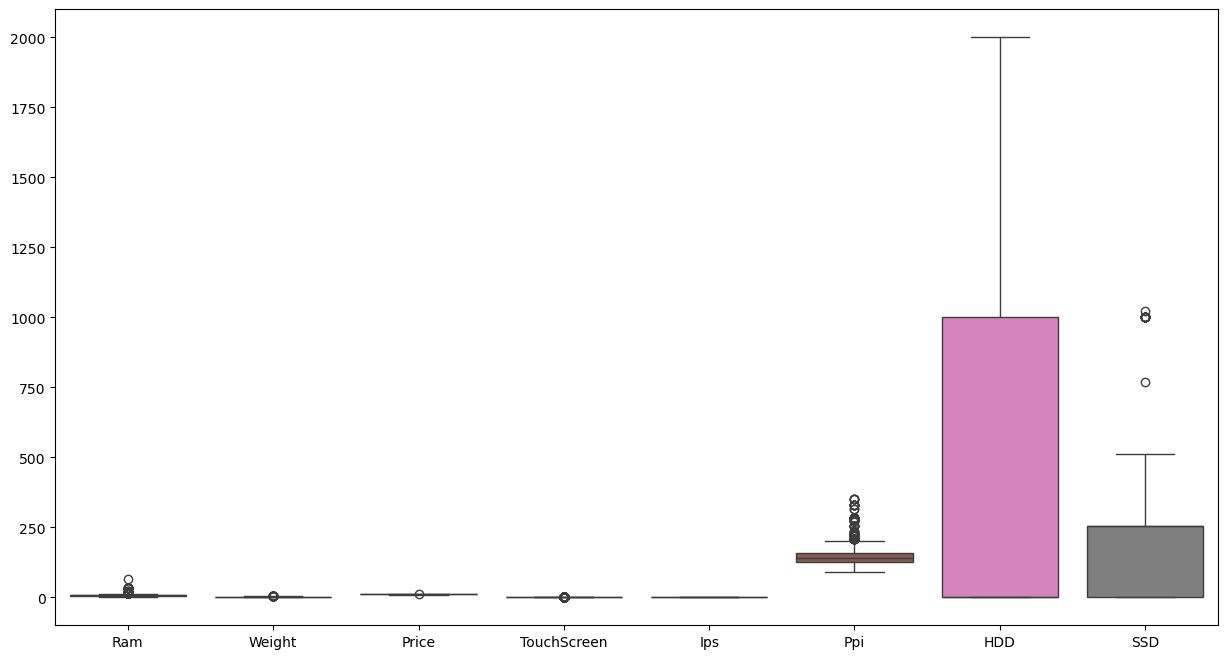

In [28]:
#Boxplot Visualization
plt.figure(figsize=(15,8))
sns.boxplot(data=laptop)
plt.show()

In [29]:
#Identify number of Classes in Gpu_brand
unique_class = {'GPU Brand':laptop['Gpu_brand'].unique(),
                'Company':laptop['Company'].unique(),
                'Type Name':laptop['TypeName'].unique(),
                'CPU Brand' :laptop['Cpu_brand'].unique(),
                'OS':laptop['Os'].unique()}
unique_df = pd.DataFrame(list(unique_class.items()), columns=['Attributes', 'Unique Value'])
unique_df

,Attributes,Unique Value
0,GPU Brand,"[Intel, AMD, Nvidia]"
1,Company,"[Apple, HP, Acer, Asus, Dell, Lenovo, Chuwi, MSI, Microsoft, Toshiba, Huawei, Xiaomi, Vero, Razer, Mediacom, Samsung, Google, Fujitsu, LG]"
2,Type Name,"[Ultrabook, Notebook, Netbook, Gaming, 2 in 1 Convertible, Workstation]"
3,CPU Brand,"[Intel Core i5, Intel Core i7, AMD Processor, Intel Core i3, Other Intel Processor]"
4,OS,"[Mac, Others, Windows]"


### Classification with ANN

In [30]:
# Drop Categrical Attributes
numerical_df =laptop.drop(laptop.columns[[0,1,8,12]], axis = 1)
numerical_df.head()

#Create x and y variables
X = numerical_df.drop('Gpu_brand',axis=1).to_numpy()
y = numerical_df['Gpu_brand'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Script for Neural Network
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(8,6,3),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 
accuracy_before = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy_before:.2f}")

Test Accuracy: 0.81


              precision    recall  f1-score   support

         AMD       0.65      0.31      0.42        35
       Intel       0.82      0.94      0.88       141
      Nvidia       0.83      0.78      0.81        79

    accuracy                           0.81       255
   macro avg       0.76      0.68      0.70       255
weighted avg       0.80      0.81      0.79       255



 Confusion Matrix




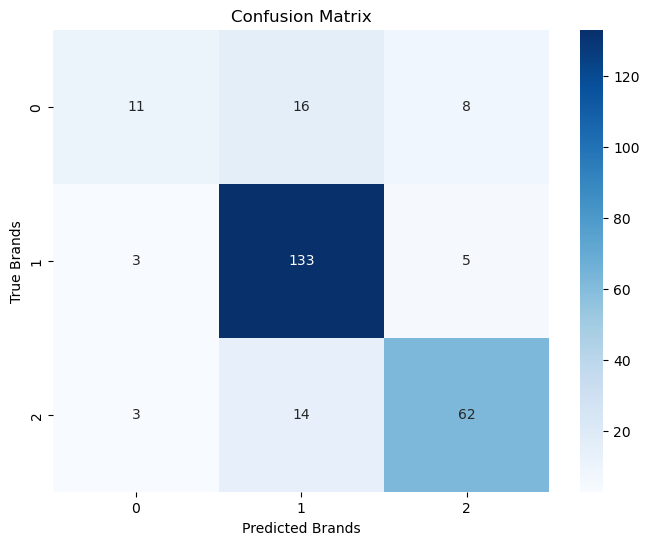

In [32]:
#Evaluation Report and Matrix
conf_matrix =confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))
print('\n\n Confusion Matrix\n\n')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Brands')
plt.ylabel('True Brands')
plt.show() 

The model shows strong performance for the **Intel** and **Nvidia** classes, with both achieving high precision, recall, and F1-scores. **Intel** has the best metrics overall, suggesting the model is very effective at identifying Intel instances. **Nvidia** also performs well, with metrics indicating a good balance between precision and recall. However, the **AMD** class has significantly lower metrics, with recall being particularly low. This suggests that the model often fails to correctly identify AMD instances, resulting in a high number of false negatives.

There is a clear imbalance in how well the model handles different classes. The **Intel** and **Nvidia** classes perform well, whereas **AMD** struggles. This discrepancy may be due to a class imbalance in the dataset, with fewer AMD instances compared to Intel and Nvidia, making it difficult for the model to learn its features effectively. This is further supported by the differences between the macro and weighted averages, which indicate that the model's performance is inconsistent across classes.

The model's accuracy is 0.81, indicating it correctly classifies 81% of the instances. However, given the class imbalance, accuracy alone is not a reliable indicator of the model's performance, as it masks the poor recall for the AMD class. To improve the model, techniques like **oversampling** or **undersampling** could be used to balance the dataset. Additionally, **hyperparameter tuning** and **feature engineering** could help the model better capture the distinctions between AMD and the other classes, ultimately improving recall and overall performance.

### Model Performance Improvement

#### 1. Hyper Parameter Tunning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Load dataset
data = pd.read_csv('laptop_data_price_prediction.csv')

# Label Encoding GPU Type
label_encoder = LabelEncoder()
data['Gpu_brand'] = label_encoder.fit_transform(data['Gpu_brand'])

# Feature Selection
X = data.drop('Gpu_brand', axis=1)
y = data['Gpu_brand']

# Encoding categorical features using one-hot encoding
X = pd.get_dummies(X)

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create MLPClassifier model
mlp_model = MLPClassifier(random_state=42, max_iter=10000, )

In [34]:
# Parameters for grid search
param_grid = {
    'hidden_layer_sizes': [(10,), (8, 6),],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Grid Search to find the best parameters
grid = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (8, 6), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Score:  0.8487680027763318


In [35]:

# Training the final model with the best parameters
best_mlp_model = MLPClassifier(**grid_result.best_params_, random_state=42, max_iter=10000)
best_mlp_model.fit(X_train, y_train)

# Evaluating the model
y_pred = best_mlp_model.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_after:.2f}")

Test Accuracy: 0.85


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        32
           1       0.89      0.89      0.89       143
           2       0.88      0.82      0.85        80

    accuracy                           0.85       255
   macro avg       0.81      0.82      0.81       255
weighted avg       0.86      0.85      0.85       255



 Confusion Matrix




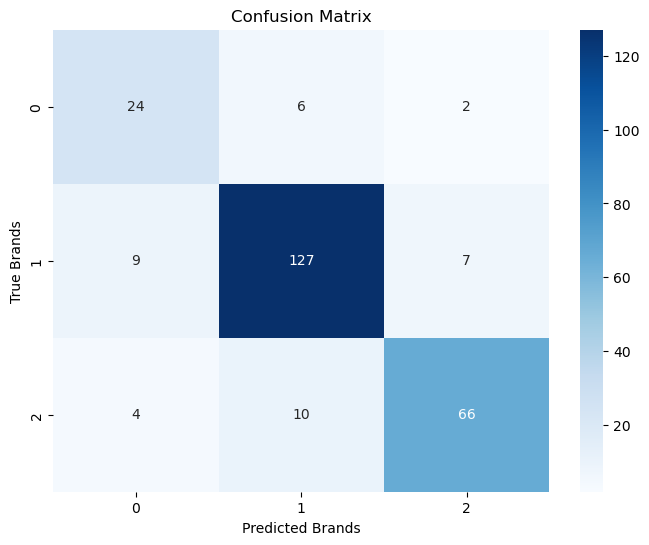

In [36]:
#Evaluation Report and Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

print('\n\n Confusion Matrix\n\n')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Brands')
plt.ylabel('True Brands')
plt.show() 

In [37]:
metrics = {
    'precision':[0.65,0.89,0.88],
    'recall':[0.75,0.89,0.82],
    'f1-score':[0.7,0.89,0.85]
    
}

metric_df = pd.DataFrame(metrics, index = ['AMD', 'Intel', 'Nvidia'])
print(metric_df)

print(f'\nAccuracy :', round(accuracy_after,2),'%')

        precision  recall  f1-score
AMD          0.65    0.75      0.70
Intel        0.89    0.89      0.89
Nvidia       0.88    0.82      0.85

Accuracy : 0.85 %


## Observation

After applying hyperparameter tuning, the model’s overall performance has improved significantly across all three brands—**AMD**, **Intel**, and **Nvidia**. Starting with **AMD (Brand 0)**, which initially exhibited very poor recall at **0.31**, tuning drastically enhanced its recall to **0.75**, reducing the number of false negatives and increasing its correct identification from **11** to **24**. Precision for AMD remained steady, but the boost in recall improved the F1-score from **0.42** to **0.70**, demonstrating a more balanced classification for AMD. The impact of hyperparameter tuning on **Intel (Brand 1)** resulted in an increased precision from **0.82** to **0.89**, while recall remained consistently high at **0.89**. This means the model is now even better at correctly identifying **Intel** instances, which were already well-represented in the dataset. For **Nvidia (Brand 2)**, the precision improved from **0.83** to **0.88** and recall rose from **0.78** to **0.82**, leading to a more consistent classification of Nvidia and fewer instances misclassified as Intel.

The overall **accuracy** of the model increased from **0.81** to **0.85**, showing that the model now correctly classifies a higher proportion of total instances. The macro and weighted averages of precision, recall, and F1-score also show improvement, indicating a more balanced performance across all brands. The confusion matrix highlights fewer misclassifications across all brands, with AMD seeing the most significant reduction in false classifications. Hyperparameter tuning has effectively optimized the model's complexity and its ability to capture the nuanced differences between brands, leading to more reliable predictions for each brand. This demonstrates that tuning helped in addressing the class imbalance issue for AMD and improved overall model robustness, particularly enhancing the recall for underperforming brands without sacrificing the performance of well-performing brands like Intel.

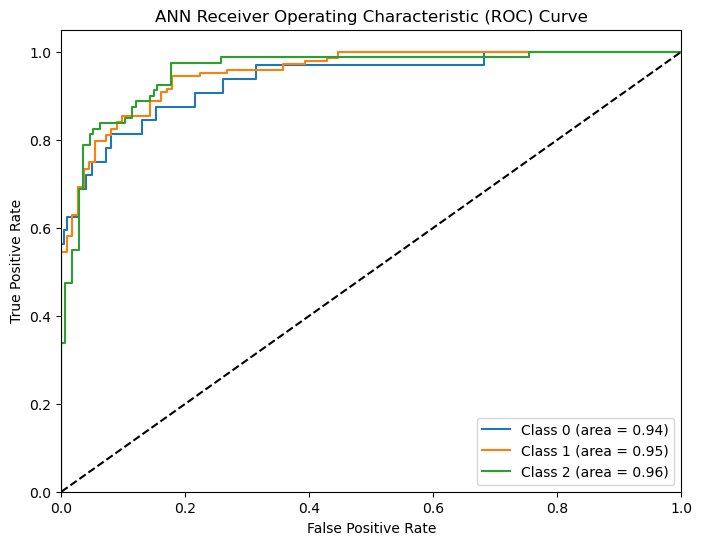

In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# ROC Curve and AUC
y_pred_proba = best_mlp_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Naive Bayes

Class distribution in y_test: {0: 32, 1: 143, 2: 80}
              precision    recall  f1-score   support

         AMD       0.20      0.97      0.33        32
       Intel       1.00      0.06      0.11       143
      Nvidia       0.41      0.46      0.43        80

    accuracy                           0.30       255
   macro avg       0.54      0.50      0.29       255
weighted avg       0.71      0.30      0.24       255



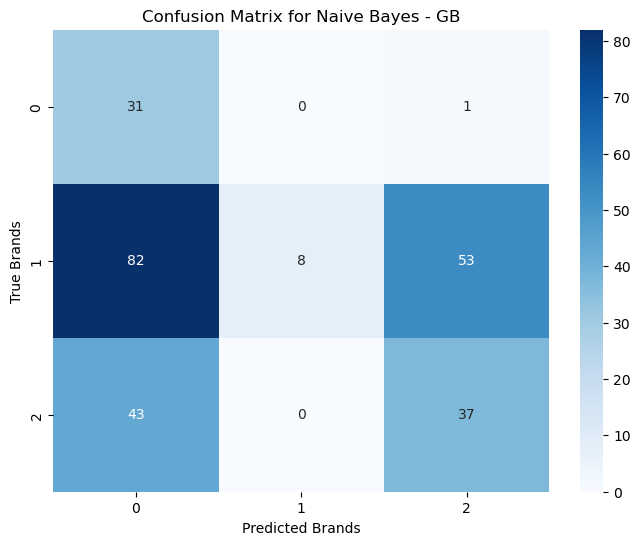

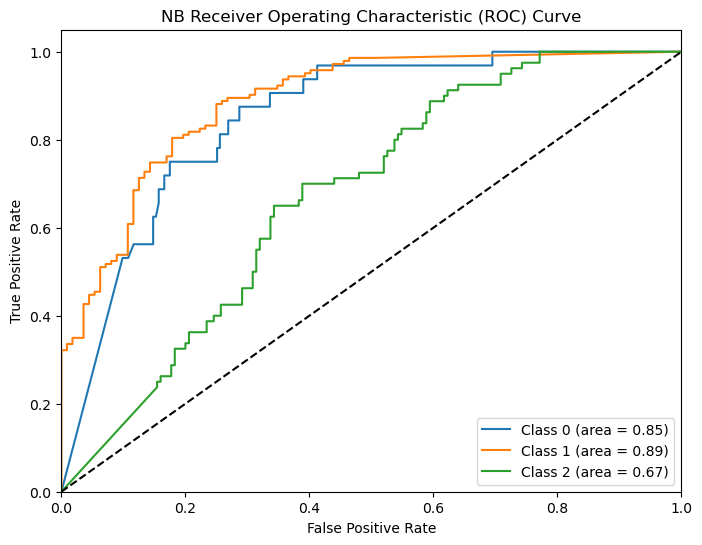

In [40]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('laptop_data_price_prediction.csv')

# Label Encoding GPU Type
label_encoder = LabelEncoder()
data['Gpu_brand'] = label_encoder.fit_transform(data['Gpu_brand'])

# Feature Selection
X = data.drop('Gpu_brand', axis=1)
y = data['Gpu_brand']

# Encoding categorical features using one-hot encoding
X = pd.get_dummies(X)

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for classes with no positive samples in the test set
unique_y_test, counts_y_test = np.unique(y_test, return_counts=True)
print("Class distribution in y_test:", dict(zip(unique_y_test, counts_y_test)))

# Ensure all classes have positive samples
if len(unique_y_test) < len(np.unique(y)):
    raise ValueError("One or more classes have no samples in y_test. Please ensure each class is represented in the test set.")

# Fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
predict = model.predict(X_test)
target_names = ['AMD', 'Intel', 'Nvidia']

# Output confusion matrix and classification report
output_4_con = confusion_matrix(y_test, predict)
output_4_class = classification_report(y_test, predict, target_names=target_names)
print(output_4_class)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(output_4_con, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes - GB')
plt.xlabel('Predicted Brands')
plt.ylabel('True Brands')
plt.show()

# ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
